In [28]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np




In [29]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age_bucket
0,0,0.000000,0.000,0.0,1.0,0.0,0.222222,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.25
1,1,0.571429,0.375,0.0,1.0,0.0,0.555556,0.714286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.50
2,2,0.000000,0.000,1.0,0.0,0.0,1.000000,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00
3,3,0.785714,0.125,1.0,0.0,0.0,0.444444,0.714286,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00
4,4,0.182375,0.375,1.0,0.0,0.0,0.888889,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00


In [30]:
data_norm = normalize(data)

data_norm = pd.DataFrame(data_norm, columns=data.columns)
data_norm.head()

,Unnamed: 0,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age_bucket
0,0.000000,0.000000,0.000000,0.000000,0.465137,0.0,0.103364,0.332241,0.465137,0.000000,0.000000,0.465137,0.0,0.000000,0.000000,0.465137,0.116284
1,0.391151,0.223515,0.146681,0.000000,0.391151,0.0,0.217306,0.279393,0.000000,0.391151,0.000000,0.391151,0.0,0.391151,0.000000,0.000000,0.195575
2,0.616914,0.000000,0.000000,0.308457,0.000000,0.0,0.308457,0.220326,0.308457,0.000000,0.000000,0.308457,0.0,0.000000,0.000000,0.308457,0.308457
3,0.765947,0.200605,0.031914,0.255316,0.000000,0.0,0.113474,0.182368,0.000000,0.255316,0.000000,0.255316,0.0,0.000000,0.255316,0.000000,0.255316
4,0.863180,0.039356,0.080923,0.215795,0.000000,0.0,0.191818,0.154139,0.215795,0.000000,0.215795,0.000000,0.0,0.000000,0.000000,0.215795,0.000000


In [31]:
data_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5244 non-null   float64
 1   Work_Experience         5244 non-null   float64
 2   Family_Size             5244 non-null   float64
 3   Graduated_No            5244 non-null   float64
 4   Graduated_Yes           5244 non-null   float64
 5   Graduated_nan           5244 non-null   float64
 6   Profession_encoded      5244 non-null   float64
 7   Var_1_encoded           5244 non-null   float64
 8   Gender_Female           5244 non-null   float64
 9   Gender_Male             5244 non-null   float64
 10  Ever_Married_No         5244 non-null   float64
 11  Ever_Married_Yes        5244 non-null   float64
 12  Ever_Married_nan        5244 non-null   float64
 13  Spending_Score_Average  5244 non-null   float64
 14  Spending_Score_High     5244 non-null   

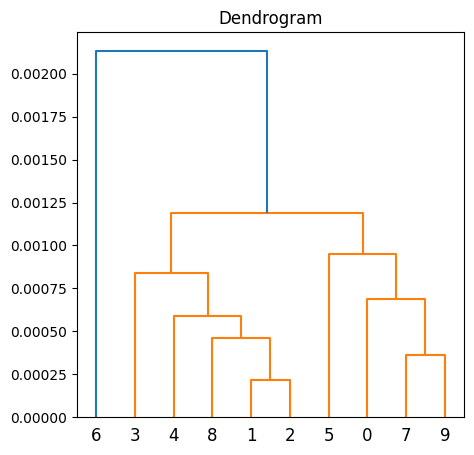

In [32]:
## dendrogram
import matplotlib.pyplot as plt
subset_data = data_norm.sample(n=10)
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))

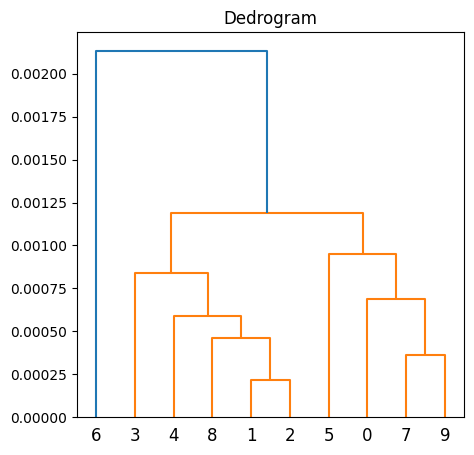

In [33]:
## break
plt.figure(figsize=(5,5))
plt.title('Dedrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method="ward"))
plt.axhline(y=1.2, color= "red", linestyle="--")

In [34]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

In [35]:
reduced_data


array([[ 1.31298074e+00, -3.91153390e-01],
       [ 9.56376870e-01,  4.73119828e-01],
       [ 7.39124759e-01, -2.46262167e-01],
       ...,
       [-2.26028777e-03, -5.45051062e-04],
       [-2.25294492e-03, -1.98130957e-04],
       [-2.24520741e-03, -5.30136478e-04]])

In [36]:
## train model
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

now = cluster.fit_predict(reduced_data)

Text(0.5, 1.0, 'Scatter plot of wholesales data')

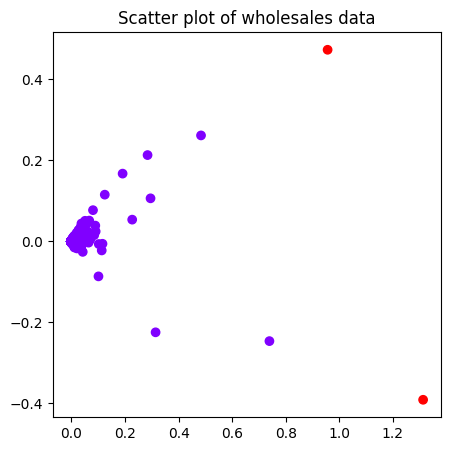

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0],y = reduced_data[:,1], c=cluster.labels_, cmap='rainbow' )
plt.title('Scatter plot of wholesales data')

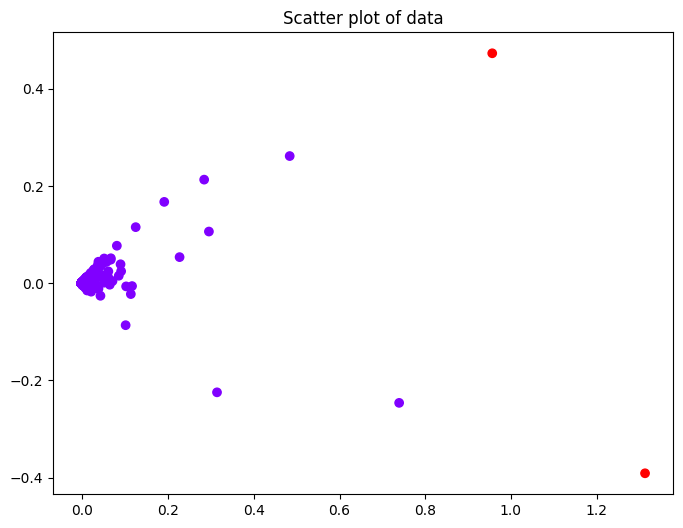

Cluster 0: 5242 data points
Cluster 1: 2 data points


In [38]:
# Assuming reduced_data and cluster are already defined
# train model
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
now = cluster.fit_predict(reduced_data)

# Count the number of data points in each cluster
unique_labels, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of data')
plt.show()

# Print the counts of data points in each cluster
for label, count in cluster_counts.items():
    print(f'Cluster {label}: {count} data points')

In [39]:
df = pd.DataFrame({'reduced_cluster': now})
df

,reduced_cluster
0,1
1,1
2,0
3,0
4,0
...,...
5239,0
5240,0
5241,0
5242,0
